# **Import thư viện**

In [4]:
import kagglehub

# Download latest versionc
path = kagglehub.dataset_download("cemeraan/3a-superstore")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '3a-superstore' dataset.
Path to dataset files: /kaggle/input/3a-superstore


# Tiền xử lý dữ liệu

In [3]:
import pandas as pd

customers = pd.read_csv(f"{path}/Customers.csv", sep=";")[["USERID", "REGION"]]

orders = pd.read_csv(f"{path}/Orders.csv")[
    ["ORDERID", "USERID", "TOTALBASKET"]
]


tiền xử lý

In [ ]:
orders["TOTALBASKET"] = (
    orders["TOTALBASKET"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

lựa chọn những đặc trung

In [ ]:
order_features = orders.groupby("USERID").agg(
    total_spent=("TOTALBASKET", "sum"),
    avg_spent=("TOTALBASKET", "mean"),
    num_orders=("ORDERID", "count"),
    max_spent=("TOTALBASKET", "max")
).reset_index()

In [ ]:
data = order_features.merge(customers, on="USERID", how="inner")

xử lý nhũng giá trị ngoại lai

In [ ]:
import numpy as np

for col in ["total_spent", "avg_spent", "max_spent"]:
    data[col] = np.log1p(data[col])

# Mô Hình học máy cho cột REGION

In [ ]:
X = data.drop(columns=["USERID", "REGION"])
y = data["REGION"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


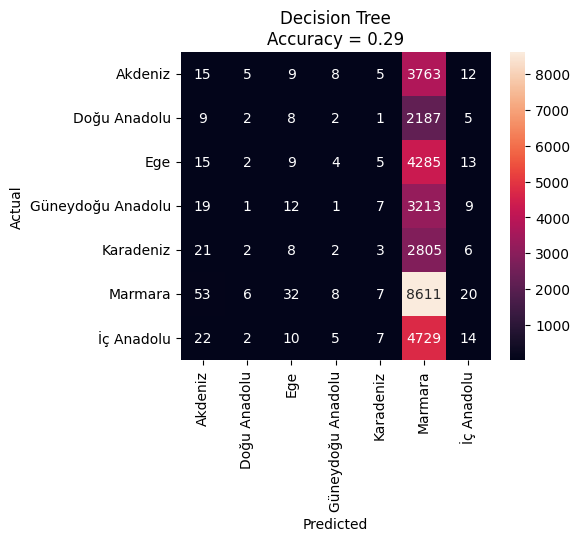

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f"Decision Tree\nAccuracy = {acc_dt:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

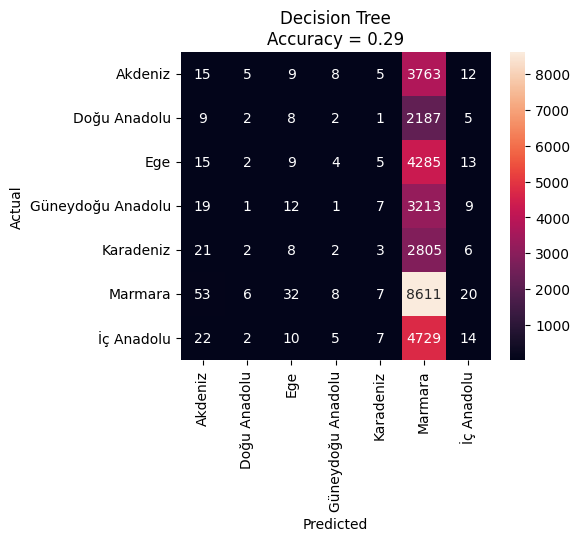

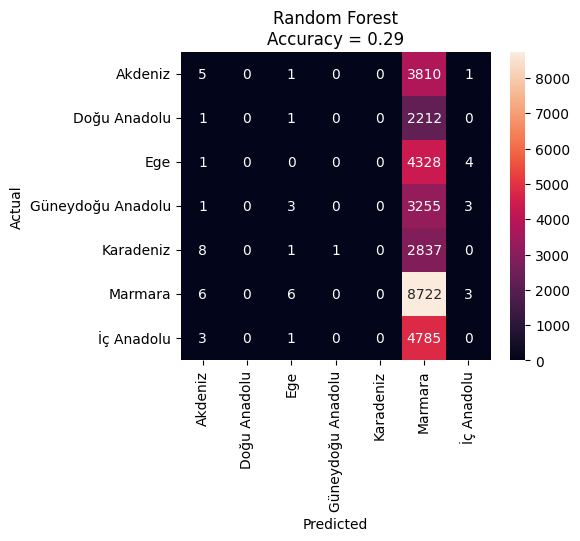

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f"Decision Tree\nAccuracy = {acc_dt:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f"Random Forest\nAccuracy = {acc_rf:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Decision Tree accuracy:", acc_dt)
print("Random Forest accuracy:", acc_rf)

Decision Tree accuracy: 0.28850961698723293
Random Forest accuracy: 0.29090969698989966


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Baseline accuracy:", accuracy_score(y_test, dummy.predict(X_test)))

Baseline accuracy: 0.29124304143471447
